# 1. 기존의 프로그램 방식

- 회귀분석(linear regression) 설명 사이트 : https://gbhat.com/machine_learning/linear_regression.html
- 오차함수 : MSE(오차제곱평균), RMSE(루트를 취하기 때문에 MSE의 단점이 어느정도 해소. 이상치에 덜 민감), MAE(mean absolute erro error ; 절대값평균)
-
https://jysden.medium.com/%EC%96%B8%EC%A0%9C-mse-maermse%EB%A5%BC-%EC%82%AC%EC%9A%A9%ED%95%98%EB%8A%94%EA%B0%80-c473bd831c62

![image](https://miro.medium.com/v2/resize:fit:4800/format:webp/1*XRXgMqrr5rq-V1rW7SkrtA.png)
- 경사하강법 설명
    - https://www.mql5.com/ko/articles/11200

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 섭씨온도(input_data)를 받아 화씨온도로 출력
def celsius_to_fahrenheit(c):
    return c * 1.8 + 32

In [3]:
input_c = int(input('섭씨 온도는? '))
print('화씨 온도는', celsius_to_fahrenheit(input_c))

섭씨 온도는? 0
화씨 온도는 32.0


# 2. 머신러닝 프로그램 방식
- 1. 데이터 확보 및 생성(inputdata, outputdata)
- 2. 데이터 전처리 (결측치, 스케일조정, 훈련데이터셋과 검증데이터셋, 시험데이터셋으로 분류 ...)
- 3. 모델 구성
- 4. 모델 학습 과정 설정(손실 함수, 옵티마이저, 평가지표)
- 5. 모델 학습시키기
- 6. 모델 평가(시험데이터셋으로)
- 7. 모델 사용(모델 저장 후, 저장된 모델을 이용하여 입력값이 주어지면 예측값 받기)

## 2.1 노이즈가 없는 데이터로 실습

In [4]:
# 1. 데이터 확보
data_c = np.arange(100)
data_c # 독립변수

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [5]:
data_f = celsius_to_fahrenheit(data_c)
data_f # 종속변수(타겟변수, output_data)

array([ 32. ,  33.8,  35.6,  37.4,  39.2,  41. ,  42.8,  44.6,  46.4,
        48.2,  50. ,  51.8,  53.6,  55.4,  57.2,  59. ,  60.8,  62.6,
        64.4,  66.2,  68. ,  69.8,  71.6,  73.4,  75.2,  77. ,  78.8,
        80.6,  82.4,  84.2,  86. ,  87.8,  89.6,  91.4,  93.2,  95. ,
        96.8,  98.6, 100.4, 102.2, 104. , 105.8, 107.6, 109.4, 111.2,
       113. , 114.8, 116.6, 118.4, 120.2, 122. , 123.8, 125.6, 127.4,
       129.2, 131. , 132.8, 134.6, 136.4, 138.2, 140. , 141.8, 143.6,
       145.4, 147.2, 149. , 150.8, 152.6, 154.4, 156.2, 158. , 159.8,
       161.6, 163.4, 165.2, 167. , 168.8, 170.6, 172.4, 174.2, 176. ,
       177.8, 179.6, 181.4, 183.2, 185. , 186.8, 188.6, 190.4, 192.2,
       194. , 195.8, 197.6, 199.4, 201.2, 203. , 204.8, 206.6, 208.4,
       210.2])

In [6]:
# 2. 데이터 전처리: 컴퓨터에게 학습시키기 위해서 스케일을 맞춤(전체의 편차를 비슷하게)
scaled_data_c = data_c/100
scaled_data_f = data_f/100

In [7]:
# GPU 사용 여부 확인
import tensorflow as tf
print(tf.__version__)
tf.config.list_physical_devices('GPU')

2.10.0


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [8]:
# 3. 모델 구성
# pip install tensorflow == 2.10
from tensorflow.keras.models import Sequential # 모델 생성
from tensorflow.keras.layers import Dense      # 입력값과 출력값으로 layer 층 지정

model = Sequential()
# model.add(Input(shape = 1))

# 모델에 layer를 추가
model.add(Dense(1, # 종속(target, 출력)변수의 개수
                input_shape = (1, ) # 독립(입력)변수의 shape
               )) 

### optimizer
![optimizer](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2Fm6NoZ%2FbtsEHFRrBMP%2F9hQsj8P8FlGMkdW0Vg0VlK%2Fimg.png)

In [9]:
# 모델 학습과정 설정(손실함수, 옵티마이저, 평가지표)
model.compile(loss      = 'mse',
              optimizer = "rmsprop",
              metrics   = ['mae']) # 측정항목
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________
None


In [10]:
# 학습하기 전 예측
model.predict(np.array([[0],
                        [0.01],]))

1/1 [==============================] - 2s 2s/step


array([[0.        ],
       [0.00693053]], dtype=float32)

In [11]:
model.save('model/before_learning.h5')

In [12]:
# 5. 학습시키기
hist = model.fit(scaled_data_c, # 독립변수(훈련데이터)
                 scaled_data_f,  # 종속변수(훈련데이터)
                 epochs = 1000, # 학습 횟수
                 verbose = 2,   # 학습시 출력 여부
                )

Epoch 1/1000
4/4 - 1s - loss: 0.8472 - mae: 0.8634 - 626ms/epoch - 157ms/step
Epoch 2/1000
4/4 - 0s - loss: 0.8266 - mae: 0.8523 - 17ms/epoch - 4ms/step
Epoch 3/1000
4/4 - 0s - loss: 0.8114 - mae: 0.8440 - 18ms/epoch - 4ms/step
Epoch 4/1000
4/4 - 0s - loss: 0.7990 - mae: 0.8370 - 17ms/epoch - 4ms/step
Epoch 5/1000
4/4 - 0s - loss: 0.7868 - mae: 0.8302 - 11ms/epoch - 3ms/step
Epoch 6/1000
4/4 - 0s - loss: 0.7759 - mae: 0.8242 - 15ms/epoch - 4ms/step
Epoch 7/1000
4/4 - 0s - loss: 0.7640 - mae: 0.8174 - 18ms/epoch - 4ms/step
Epoch 8/1000
4/4 - 0s - loss: 0.7534 - mae: 0.8114 - 17ms/epoch - 4ms/step
Epoch 9/1000
4/4 - 0s - loss: 0.7434 - mae: 0.8055 - 17ms/epoch - 4ms/step
Epoch 10/1000
4/4 - 0s - loss: 0.7336 - mae: 0.7998 - 17ms/epoch - 4ms/step
Epoch 11/1000
4/4 - 0s - loss: 0.7235 - mae: 0.7939 - 17ms/epoch - 4ms/step
Epoch 12/1000
4/4 - 0s - loss: 0.7135 - mae: 0.7880 - 16ms/epoch - 4ms/step
Epoch 13/1000
4/4 - 0s - loss: 0.7038 - mae: 0.7823 - 17ms/epoch - 4ms/step
Epoch 14/1000
4/4 

Epoch 109/1000
4/4 - 0s - loss: 0.0938 - mae: 0.2511 - 15ms/epoch - 4ms/step
Epoch 110/1000
4/4 - 0s - loss: 0.0906 - mae: 0.2464 - 18ms/epoch - 4ms/step
Epoch 111/1000
4/4 - 0s - loss: 0.0875 - mae: 0.2421 - 16ms/epoch - 4ms/step
Epoch 112/1000
4/4 - 0s - loss: 0.0845 - mae: 0.2377 - 17ms/epoch - 4ms/step
Epoch 113/1000
4/4 - 0s - loss: 0.0819 - mae: 0.2339 - 16ms/epoch - 4ms/step
Epoch 114/1000
4/4 - 0s - loss: 0.0792 - mae: 0.2300 - 16ms/epoch - 4ms/step
Epoch 115/1000
4/4 - 0s - loss: 0.0767 - mae: 0.2260 - 17ms/epoch - 4ms/step
Epoch 116/1000
4/4 - 0s - loss: 0.0743 - mae: 0.2226 - 16ms/epoch - 4ms/step
Epoch 117/1000
4/4 - 0s - loss: 0.0717 - mae: 0.2186 - 20ms/epoch - 5ms/step
Epoch 118/1000
4/4 - 0s - loss: 0.0694 - mae: 0.2152 - 14ms/epoch - 4ms/step
Epoch 119/1000
4/4 - 0s - loss: 0.0669 - mae: 0.2113 - 16ms/epoch - 4ms/step
Epoch 120/1000
4/4 - 0s - loss: 0.0644 - mae: 0.2073 - 17ms/epoch - 4ms/step
Epoch 121/1000
4/4 - 0s - loss: 0.0620 - mae: 0.2036 - 17ms/epoch - 4ms/step

Epoch 216/1000
4/4 - 0s - loss: 0.0088 - mae: 0.0810 - 19ms/epoch - 5ms/step
Epoch 217/1000
4/4 - 0s - loss: 0.0086 - mae: 0.0801 - 16ms/epoch - 4ms/step
Epoch 218/1000
4/4 - 0s - loss: 0.0084 - mae: 0.0792 - 15ms/epoch - 4ms/step
Epoch 219/1000
4/4 - 0s - loss: 0.0083 - mae: 0.0787 - 17ms/epoch - 4ms/step
Epoch 220/1000
4/4 - 0s - loss: 0.0081 - mae: 0.0776 - 18ms/epoch - 5ms/step
Epoch 221/1000
4/4 - 0s - loss: 0.0079 - mae: 0.0770 - 4ms/epoch - 990us/step
Epoch 222/1000
4/4 - 0s - loss: 0.0078 - mae: 0.0761 - 15ms/epoch - 4ms/step
Epoch 223/1000
4/4 - 0s - loss: 0.0076 - mae: 0.0755 - 17ms/epoch - 4ms/step
Epoch 224/1000
4/4 - 0s - loss: 0.0075 - mae: 0.0747 - 17ms/epoch - 4ms/step
Epoch 225/1000
4/4 - 0s - loss: 0.0073 - mae: 0.0738 - 16ms/epoch - 4ms/step
Epoch 226/1000
4/4 - 0s - loss: 0.0072 - mae: 0.0732 - 16ms/epoch - 4ms/step
Epoch 227/1000
4/4 - 0s - loss: 0.0070 - mae: 0.0723 - 16ms/epoch - 4ms/step
Epoch 228/1000
4/4 - 0s - loss: 0.0069 - mae: 0.0716 - 17ms/epoch - 4ms/ste

Epoch 321/1000
4/4 - 0s - loss: 6.5963e-06 - mae: 0.0021 - 17ms/epoch - 4ms/step
Epoch 322/1000
4/4 - 0s - loss: 4.1512e-06 - mae: 0.0018 - 18ms/epoch - 4ms/step
Epoch 323/1000
4/4 - 0s - loss: 2.7754e-06 - mae: 0.0014 - 17ms/epoch - 4ms/step
Epoch 324/1000
4/4 - 0s - loss: 2.0600e-06 - mae: 0.0012 - 16ms/epoch - 4ms/step
Epoch 325/1000
4/4 - 0s - loss: 6.4066e-07 - mae: 6.9292e-04 - 18ms/epoch - 5ms/step
Epoch 326/1000
4/4 - 0s - loss: 3.9097e-07 - mae: 5.2570e-04 - 18ms/epoch - 4ms/step
Epoch 327/1000
4/4 - 0s - loss: 2.5173e-07 - mae: 4.2366e-04 - 13ms/epoch - 3ms/step
Epoch 328/1000
4/4 - 0s - loss: 6.2614e-07 - mae: 7.3922e-04 - 29ms/epoch - 7ms/step
Epoch 329/1000
4/4 - 0s - loss: 9.3550e-07 - mae: 9.2903e-04 - 12ms/epoch - 3ms/step
Epoch 330/1000
4/4 - 0s - loss: 6.8401e-07 - mae: 7.8897e-04 - 33ms/epoch - 8ms/step
Epoch 331/1000
4/4 - 0s - loss: 2.9041e-07 - mae: 5.2599e-04 - 20ms/epoch - 5ms/step
Epoch 332/1000
4/4 - 0s - loss: 1.5322e-07 - mae: 3.7237e-04 - 20ms/epoch - 5ms/s

4/4 - 0s - loss: 5.4096e-07 - mae: 7.1407e-04 - 16ms/epoch - 4ms/step
Epoch 419/1000
4/4 - 0s - loss: 3.1117e-07 - mae: 5.4046e-04 - 16ms/epoch - 4ms/step
Epoch 420/1000
4/4 - 0s - loss: 1.2927e-06 - mae: 0.0011 - 17ms/epoch - 4ms/step
Epoch 421/1000
4/4 - 0s - loss: 4.9938e-07 - mae: 6.6913e-04 - 16ms/epoch - 4ms/step
Epoch 422/1000
4/4 - 0s - loss: 3.2588e-07 - mae: 5.6076e-04 - 4ms/epoch - 1ms/step
Epoch 423/1000
4/4 - 0s - loss: 4.5733e-07 - mae: 6.5879e-04 - 15ms/epoch - 4ms/step
Epoch 424/1000
4/4 - 0s - loss: 1.4179e-06 - mae: 0.0011 - 14ms/epoch - 3ms/step
Epoch 425/1000
4/4 - 0s - loss: 1.7303e-07 - mae: 3.8917e-04 - 15ms/epoch - 4ms/step
Epoch 426/1000
4/4 - 0s - loss: 1.7871e-07 - mae: 4.0218e-04 - 18ms/epoch - 5ms/step
Epoch 427/1000
4/4 - 0s - loss: 9.4793e-07 - mae: 9.4362e-04 - 17ms/epoch - 4ms/step
Epoch 428/1000
4/4 - 0s - loss: 7.7658e-07 - mae: 8.4307e-04 - 16ms/epoch - 4ms/step
Epoch 429/1000
4/4 - 0s - loss: 4.0775e-07 - mae: 6.2201e-04 - 12ms/epoch - 3ms/step
Epoc

Epoch 516/1000
4/4 - 0s - loss: 9.5801e-07 - mae: 9.5061e-04 - 8ms/epoch - 2ms/step
Epoch 517/1000
4/4 - 0s - loss: 3.0519e-07 - mae: 5.3733e-04 - 17ms/epoch - 4ms/step
Epoch 518/1000
4/4 - 0s - loss: 3.8666e-07 - mae: 6.0437e-04 - 16ms/epoch - 4ms/step
Epoch 519/1000
4/4 - 0s - loss: 4.0504e-07 - mae: 6.2156e-04 - 21ms/epoch - 5ms/step
Epoch 520/1000
4/4 - 0s - loss: 1.4850e-06 - mae: 0.0012 - 15ms/epoch - 4ms/step
Epoch 521/1000
4/4 - 0s - loss: 1.8092e-07 - mae: 4.1329e-04 - 16ms/epoch - 4ms/step
Epoch 522/1000
4/4 - 0s - loss: 2.3819e-07 - mae: 4.7660e-04 - 3ms/epoch - 732us/step
Epoch 523/1000
4/4 - 0s - loss: 2.1084e-07 - mae: 4.2601e-04 - 16ms/epoch - 4ms/step
Epoch 524/1000
4/4 - 0s - loss: 1.3739e-06 - mae: 0.0012 - 18ms/epoch - 5ms/step
Epoch 525/1000
4/4 - 0s - loss: 7.8025e-07 - mae: 8.1150e-04 - 18ms/epoch - 4ms/step
Epoch 526/1000
4/4 - 0s - loss: 8.4034e-08 - mae: 2.8281e-04 - 21ms/epoch - 5ms/step
Epoch 527/1000
4/4 - 0s - loss: 1.6589e-07 - mae: 3.8599e-04 - 22ms/epoch

Epoch 614/1000
4/4 - 0s - loss: 9.0800e-07 - mae: 9.3317e-04 - 18ms/epoch - 4ms/step
Epoch 615/1000
4/4 - 0s - loss: 2.7946e-07 - mae: 5.1982e-04 - 17ms/epoch - 4ms/step
Epoch 616/1000
4/4 - 0s - loss: 1.5134e-07 - mae: 3.7187e-04 - 16ms/epoch - 4ms/step
Epoch 617/1000
4/4 - 0s - loss: 9.2144e-07 - mae: 9.2062e-04 - 21ms/epoch - 5ms/step
Epoch 618/1000
4/4 - 0s - loss: 1.0891e-06 - mae: 9.6632e-04 - 16ms/epoch - 4ms/step
Epoch 619/1000
4/4 - 0s - loss: 2.9362e-08 - mae: 1.6496e-04 - 16ms/epoch - 4ms/step
Epoch 620/1000
4/4 - 0s - loss: 6.9547e-08 - mae: 2.5029e-04 - 20ms/epoch - 5ms/step
Epoch 621/1000
4/4 - 0s - loss: 1.1120e-06 - mae: 0.0010 - 18ms/epoch - 5ms/step
Epoch 622/1000
4/4 - 0s - loss: 6.2555e-07 - mae: 7.6815e-04 - 19ms/epoch - 5ms/step
Epoch 623/1000
4/4 - 0s - loss: 2.7006e-07 - mae: 5.1129e-04 - 16ms/epoch - 4ms/step
Epoch 624/1000
4/4 - 0s - loss: 5.5042e-07 - mae: 7.2768e-04 - 16ms/epoch - 4ms/step
Epoch 625/1000
4/4 - 0s - loss: 1.3018e-06 - mae: 0.0011 - 17ms/epoch

Epoch 711/1000
4/4 - 0s - loss: 4.3093e-09 - mae: 6.1702e-05 - 34ms/epoch - 8ms/step
Epoch 712/1000
4/4 - 0s - loss: 1.1863e-07 - mae: 3.0723e-04 - 16ms/epoch - 4ms/step
Epoch 713/1000
4/4 - 0s - loss: 2.0524e-06 - mae: 0.0014 - 17ms/epoch - 4ms/step
Epoch 714/1000
4/4 - 0s - loss: 1.6714e-07 - mae: 3.8897e-04 - 26ms/epoch - 7ms/step
Epoch 715/1000
4/4 - 0s - loss: 4.7903e-08 - mae: 2.1123e-04 - 18ms/epoch - 4ms/step
Epoch 716/1000
4/4 - 0s - loss: 8.4564e-07 - mae: 8.6585e-04 - 16ms/epoch - 4ms/step
Epoch 717/1000
4/4 - 0s - loss: 3.0902e-07 - mae: 5.4417e-04 - 16ms/epoch - 4ms/step
Epoch 718/1000
4/4 - 0s - loss: 6.4792e-07 - mae: 7.6964e-04 - 18ms/epoch - 4ms/step
Epoch 719/1000
4/4 - 0s - loss: 2.6960e-07 - mae: 4.9492e-04 - 16ms/epoch - 4ms/step
Epoch 720/1000
4/4 - 0s - loss: 1.2410e-06 - mae: 0.0011 - 18ms/epoch - 4ms/step
Epoch 721/1000
4/4 - 0s - loss: 9.1451e-08 - mae: 2.8181e-04 - 19ms/epoch - 5ms/step
Epoch 722/1000
4/4 - 0s - loss: 8.0517e-09 - mae: 7.4193e-05 - 16ms/epoch

4/4 - 0s - loss: 7.1441e-07 - mae: 8.2443e-04 - 16ms/epoch - 4ms/step
Epoch 809/1000
4/4 - 0s - loss: 3.8385e-07 - mae: 6.0774e-04 - 16ms/epoch - 4ms/step
Epoch 810/1000
4/4 - 0s - loss: 6.8619e-07 - mae: 8.1479e-04 - 16ms/epoch - 4ms/step
Epoch 811/1000
4/4 - 0s - loss: 1.2185e-06 - mae: 0.0010 - 17ms/epoch - 4ms/step
Epoch 812/1000
4/4 - 0s - loss: 8.6254e-08 - mae: 2.7693e-04 - 19ms/epoch - 5ms/step
Epoch 813/1000
4/4 - 0s - loss: 1.6193e-07 - mae: 3.7964e-04 - 16ms/epoch - 4ms/step
Epoch 814/1000
4/4 - 0s - loss: 1.4246e-06 - mae: 0.0012 - 18ms/epoch - 5ms/step
Epoch 815/1000
4/4 - 0s - loss: 1.9899e-07 - mae: 4.3721e-04 - 17ms/epoch - 4ms/step
Epoch 816/1000
4/4 - 0s - loss: 5.9027e-07 - mae: 7.4576e-04 - 17ms/epoch - 4ms/step
Epoch 817/1000
4/4 - 0s - loss: 3.4450e-07 - mae: 5.7149e-04 - 16ms/epoch - 4ms/step
Epoch 818/1000
4/4 - 0s - loss: 1.0983e-06 - mae: 0.0010 - 17ms/epoch - 4ms/step
Epoch 819/1000
4/4 - 0s - loss: 5.9553e-07 - mae: 7.4072e-04 - 17ms/epoch - 4ms/step
Epoch 8

4/4 - 0s - loss: 7.4355e-07 - mae: 8.4664e-04 - 18ms/epoch - 4ms/step
Epoch 906/1000
4/4 - 0s - loss: 6.0852e-07 - mae: 7.6514e-04 - 30ms/epoch - 7ms/step
Epoch 907/1000
4/4 - 0s - loss: 4.2822e-07 - mae: 6.4055e-04 - 17ms/epoch - 4ms/step
Epoch 908/1000
4/4 - 0s - loss: 3.2337e-07 - mae: 5.5159e-04 - 16ms/epoch - 4ms/step
Epoch 909/1000
4/4 - 0s - loss: 9.5543e-07 - mae: 9.5376e-04 - 14ms/epoch - 4ms/step
Epoch 910/1000
4/4 - 0s - loss: 4.1981e-07 - mae: 6.3198e-04 - 17ms/epoch - 4ms/step
Epoch 911/1000
4/4 - 0s - loss: 4.1579e-07 - mae: 6.3397e-04 - 16ms/epoch - 4ms/step
Epoch 912/1000
4/4 - 0s - loss: 7.7340e-07 - mae: 8.6263e-04 - 17ms/epoch - 4ms/step
Epoch 913/1000
4/4 - 0s - loss: 7.4120e-07 - mae: 8.3829e-04 - 18ms/epoch - 5ms/step
Epoch 914/1000
4/4 - 0s - loss: 1.5648e-07 - mae: 3.8774e-04 - 18ms/epoch - 4ms/step
Epoch 915/1000
4/4 - 0s - loss: 7.2326e-07 - mae: 8.3110e-04 - 0s/epoch - 0s/step
Epoch 916/1000
4/4 - 0s - loss: 2.6952e-07 - mae: 4.9482e-04 - 16ms/epoch - 4ms/ste

In [13]:
# 6. 모델 평가(시험 데이터 셋으로 모델 평가), 그래프 그리기
hist.history.keys()

dict_keys(['loss', 'mae'])

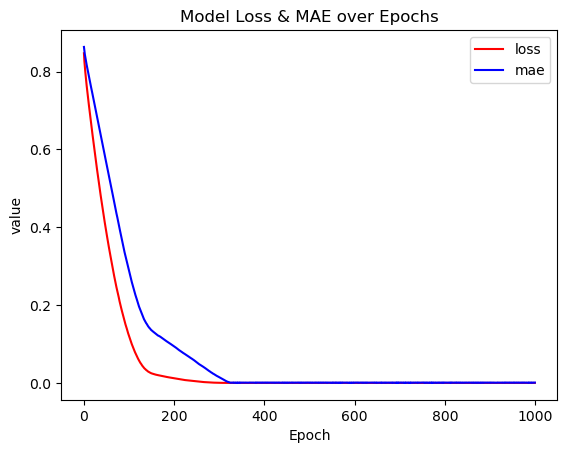

In [14]:
plt.plot(hist.history['loss'], 
         'r', 
         label = 'loss')
plt.plot(hist.history['mae'],
         'b',
         label = 'mae')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('value')
plt.title('Model Loss & MAE over Epochs')
plt.show()

In [15]:
# 7. 모델 사용하기
model.predict(np.array([[0],
                        [0.01]]))

1/1 [==============================] - 0s 17ms/step


array([[0.31955463],
       [0.33755016]], dtype=float32)

In [16]:
model.save('model/after_learning.h5')

In [17]:
# 실제값: scaled_data_f
# 예측값: y_hat
y_hat = model.predict([scaled_data_c])
for y, h in zip(scaled_data_f, y_hat):
    print('실제값:{}, 예측값{}'.format(round(y*100, 1), 
                                      round(h[0]*100, 1)))

4/4 [==============================] - 0s 6ms/step
실제값:32.0, 예측값32.0
실제값:33.8, 예측값33.8
실제값:35.6, 예측값35.6
실제값:37.4, 예측값37.4
실제값:39.2, 예측값39.2
실제값:41.0, 예측값41.0
실제값:42.8, 예측값42.8
실제값:44.6, 예측값44.6
실제값:46.4, 예측값46.4
실제값:48.2, 예측값48.2
실제값:50.0, 예측값50.0
실제값:51.8, 예측값51.8
실제값:53.6, 예측값53.6
실제값:55.4, 예측값55.3
실제값:57.2, 예측값57.1
실제값:59.0, 예측값58.9
실제값:60.8, 예측값60.7
실제값:62.6, 예측값62.5
실제값:64.4, 예측값64.3
실제값:66.2, 예측값66.1
실제값:68.0, 예측값67.9
실제값:69.8, 예측값69.7
실제값:71.6, 예측값71.5
실제값:73.4, 예측값73.3
실제값:75.2, 예측값75.1
실제값:77.0, 예측값76.9
실제값:78.8, 예측값78.7
실제값:80.6, 예측값80.5
실제값:82.4, 예측값82.3
실제값:84.2, 예측값84.1
실제값:86.0, 예측값85.9
실제값:87.8, 예측값87.7
실제값:89.6, 예측값89.5
실제값:91.4, 예측값91.3
실제값:93.2, 예측값93.1
실제값:95.0, 예측값94.9
실제값:96.8, 예측값96.7
실제값:98.6, 예측값98.5
실제값:100.4, 예측값100.3
실제값:102.2, 예측값102.1
실제값:104.0, 예측값103.9
실제값:105.8, 예측값105.7
실제값:107.6, 예측값107.5
실제값:109.4, 예측값109.3
실제값:111.2, 예측값111.1
실제값:113.0, 예측값112.9
실제값:114.8, 예측값114.7
실제값:116.6, 예측값116.5
실제값:118.4, 예측값118.3
실제값:120.2, 예측값120.1
실제값:122.0, 예측값121.9
실제값:1

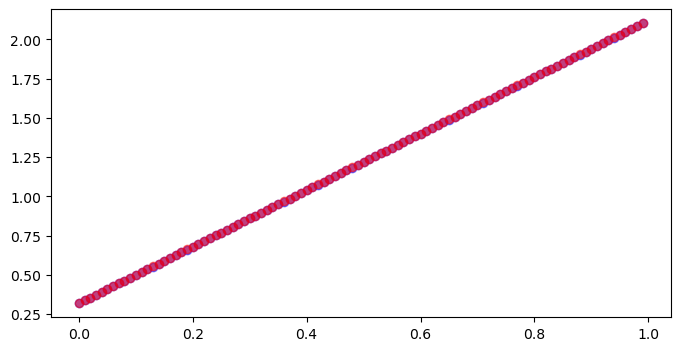

In [18]:
plt.figure(figsize = (8, 4))
plt.scatter(x = scaled_data_c,
            y = y_hat,
            c = 'b',
            alpha = .5)
plt.scatter(x = scaled_data_c,
            y = scaled_data_f,
            c = 'r',
            alpha = .5)
plt.show()

## 2.2 노이즈가 있는 데이터로 실습

In [19]:
# 평균이 0이고 표준편차가 0.1인 정규분포를 이루는 데이터 100
np.random.seed(7)
noise = np.random.normal(loc   = 0,
                         scale = .1, 
                         size  = 100)
# print(noise)
# print(scaled_data_f)
scaled_data_f = scaled_data_f + noise

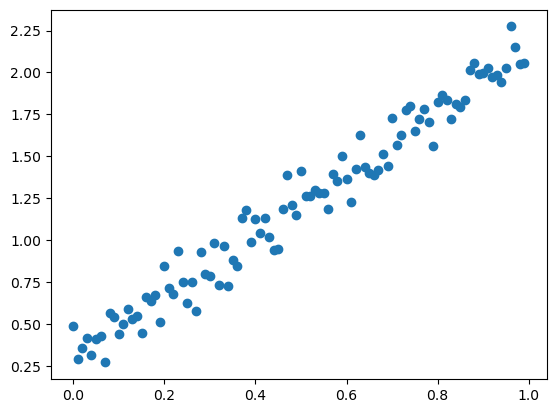

In [20]:
plt.scatter(x = scaled_data_c, 
            y = scaled_data_f)
plt.show()

In [21]:
# 3. 모델 구성
model2 = Sequential()
model2.add(Dense(1, 
                 input_shape = (1,)))

# 4. 모델 학습과정 설정
model2.compile(loss      = 'mse', 
               optimizer = 'rmsprop',
               metrics   = ['mae'])
print(model2.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________
None


In [22]:
# 5. 학습시키기
hist2 = model2.fit(scaled_data_c, 
                   scaled_data_f,
                   epochs  = 1000,
                   verbose = 2)

Epoch 1/1000
4/4 - 0s - loss: 0.8180 - mae: 0.8414 - 351ms/epoch - 88ms/step
Epoch 2/1000
4/4 - 0s - loss: 0.7983 - mae: 0.8303 - 19ms/epoch - 5ms/step
Epoch 3/1000
4/4 - 0s - loss: 0.7848 - mae: 0.8228 - 15ms/epoch - 4ms/step
Epoch 4/1000
4/4 - 0s - loss: 0.7721 - mae: 0.8155 - 20ms/epoch - 5ms/step
Epoch 5/1000
4/4 - 0s - loss: 0.7606 - mae: 0.8089 - 17ms/epoch - 4ms/step
Epoch 6/1000
4/4 - 0s - loss: 0.7490 - mae: 0.8022 - 19ms/epoch - 5ms/step
Epoch 7/1000
4/4 - 0s - loss: 0.7385 - mae: 0.7962 - 20ms/epoch - 5ms/step
Epoch 8/1000
4/4 - 0s - loss: 0.7277 - mae: 0.7898 - 14ms/epoch - 4ms/step
Epoch 9/1000
4/4 - 0s - loss: 0.7173 - mae: 0.7837 - 16ms/epoch - 4ms/step
Epoch 10/1000
4/4 - 0s - loss: 0.7068 - mae: 0.7774 - 18ms/epoch - 4ms/step
Epoch 11/1000
4/4 - 0s - loss: 0.6974 - mae: 0.7716 - 18ms/epoch - 5ms/step
Epoch 12/1000
4/4 - 0s - loss: 0.6881 - mae: 0.7660 - 20ms/epoch - 5ms/step
Epoch 13/1000
4/4 - 0s - loss: 0.6787 - mae: 0.7603 - 19ms/epoch - 5ms/step
Epoch 14/1000
4/4 -

Epoch 109/1000
4/4 - 0s - loss: 0.0937 - mae: 0.2479 - 17ms/epoch - 4ms/step
Epoch 110/1000
4/4 - 0s - loss: 0.0910 - mae: 0.2441 - 16ms/epoch - 4ms/step
Epoch 111/1000
4/4 - 0s - loss: 0.0881 - mae: 0.2399 - 15ms/epoch - 4ms/step
Epoch 112/1000
4/4 - 0s - loss: 0.0857 - mae: 0.2366 - 16ms/epoch - 4ms/step
Epoch 113/1000
4/4 - 0s - loss: 0.0835 - mae: 0.2336 - 14ms/epoch - 3ms/step
Epoch 114/1000
4/4 - 0s - loss: 0.0814 - mae: 0.2309 - 14ms/epoch - 3ms/step
Epoch 115/1000
4/4 - 0s - loss: 0.0791 - mae: 0.2277 - 19ms/epoch - 5ms/step
Epoch 116/1000
4/4 - 0s - loss: 0.0767 - mae: 0.2244 - 16ms/epoch - 4ms/step
Epoch 117/1000
4/4 - 0s - loss: 0.0741 - mae: 0.2208 - 16ms/epoch - 4ms/step
Epoch 118/1000
4/4 - 0s - loss: 0.0718 - mae: 0.2174 - 24ms/epoch - 6ms/step
Epoch 119/1000
4/4 - 0s - loss: 0.0694 - mae: 0.2141 - 17ms/epoch - 4ms/step
Epoch 120/1000
4/4 - 0s - loss: 0.0674 - mae: 0.2113 - 17ms/epoch - 4ms/step
Epoch 121/1000
4/4 - 0s - loss: 0.0654 - mae: 0.2086 - 17ms/epoch - 4ms/step

Epoch 216/1000
4/4 - 0s - loss: 0.0196 - mae: 0.1151 - 16ms/epoch - 4ms/step
Epoch 217/1000
4/4 - 0s - loss: 0.0195 - mae: 0.1149 - 16ms/epoch - 4ms/step
Epoch 218/1000
4/4 - 0s - loss: 0.0193 - mae: 0.1143 - 16ms/epoch - 4ms/step
Epoch 219/1000
4/4 - 0s - loss: 0.0192 - mae: 0.1137 - 21ms/epoch - 5ms/step
Epoch 220/1000
4/4 - 0s - loss: 0.0190 - mae: 0.1131 - 13ms/epoch - 3ms/step
Epoch 221/1000
4/4 - 0s - loss: 0.0189 - mae: 0.1125 - 16ms/epoch - 4ms/step
Epoch 222/1000
4/4 - 0s - loss: 0.0188 - mae: 0.1120 - 17ms/epoch - 4ms/step
Epoch 223/1000
4/4 - 0s - loss: 0.0186 - mae: 0.1117 - 18ms/epoch - 4ms/step
Epoch 224/1000
4/4 - 0s - loss: 0.0185 - mae: 0.1112 - 20ms/epoch - 5ms/step
Epoch 225/1000
4/4 - 0s - loss: 0.0183 - mae: 0.1106 - 17ms/epoch - 4ms/step
Epoch 226/1000
4/4 - 0s - loss: 0.0182 - mae: 0.1102 - 17ms/epoch - 4ms/step
Epoch 227/1000
4/4 - 0s - loss: 0.0181 - mae: 0.1098 - 17ms/epoch - 4ms/step
Epoch 228/1000
4/4 - 0s - loss: 0.0180 - mae: 0.1093 - 16ms/epoch - 4ms/step

Epoch 323/1000
4/4 - 0s - loss: 0.0112 - mae: 0.0832 - 12ms/epoch - 3ms/step
Epoch 324/1000
4/4 - 0s - loss: 0.0112 - mae: 0.0832 - 16ms/epoch - 4ms/step
Epoch 325/1000
4/4 - 0s - loss: 0.0112 - mae: 0.0831 - 18ms/epoch - 4ms/step
Epoch 326/1000
4/4 - 0s - loss: 0.0112 - mae: 0.0832 - 15ms/epoch - 4ms/step
Epoch 327/1000
4/4 - 0s - loss: 0.0111 - mae: 0.0829 - 22ms/epoch - 6ms/step
Epoch 328/1000
4/4 - 0s - loss: 0.0111 - mae: 0.0826 - 8ms/epoch - 2ms/step
Epoch 329/1000
4/4 - 0s - loss: 0.0111 - mae: 0.0828 - 18ms/epoch - 4ms/step
Epoch 330/1000
4/4 - 0s - loss: 0.0111 - mae: 0.0828 - 13ms/epoch - 3ms/step
Epoch 331/1000
4/4 - 0s - loss: 0.0111 - mae: 0.0828 - 16ms/epoch - 4ms/step
Epoch 332/1000
4/4 - 0s - loss: 0.0111 - mae: 0.0826 - 22ms/epoch - 6ms/step
Epoch 333/1000
4/4 - 0s - loss: 0.0111 - mae: 0.0826 - 16ms/epoch - 4ms/step
Epoch 334/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0827 - 16ms/epoch - 4ms/step
Epoch 335/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0825 - 17ms/epoch - 4ms/step


Epoch 430/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0804 - 10ms/epoch - 3ms/step
Epoch 431/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0804 - 16ms/epoch - 4ms/step
Epoch 432/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0806 - 16ms/epoch - 4ms/step
Epoch 433/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0806 - 20ms/epoch - 5ms/step
Epoch 434/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0806 - 20ms/epoch - 5ms/step
Epoch 435/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0806 - 19ms/epoch - 5ms/step
Epoch 436/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0804 - 17ms/epoch - 4ms/step
Epoch 437/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0803 - 27ms/epoch - 7ms/step
Epoch 438/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0805 - 18ms/epoch - 5ms/step
Epoch 439/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0805 - 23ms/epoch - 6ms/step
Epoch 440/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0805 - 19ms/epoch - 5ms/step
Epoch 441/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0808 - 17ms/epoch - 4ms/step
Epoch 442/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0808 - 20ms/epoch - 5ms/step

Epoch 537/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0806 - 19ms/epoch - 5ms/step
Epoch 538/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0807 - 17ms/epoch - 4ms/step
Epoch 539/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0809 - 7ms/epoch - 2ms/step
Epoch 540/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0806 - 15ms/epoch - 4ms/step
Epoch 541/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0806 - 16ms/epoch - 4ms/step
Epoch 542/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0807 - 16ms/epoch - 4ms/step
Epoch 543/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0808 - 19ms/epoch - 5ms/step
Epoch 544/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0806 - 14ms/epoch - 3ms/step
Epoch 545/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0807 - 16ms/epoch - 4ms/step
Epoch 546/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0806 - 17ms/epoch - 4ms/step
Epoch 547/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0806 - 16ms/epoch - 4ms/step
Epoch 548/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0807 - 16ms/epoch - 4ms/step
Epoch 549/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0805 - 17ms/epoch - 4ms/step


Epoch 644/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0805 - 18ms/epoch - 5ms/step
Epoch 645/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0802 - 15ms/epoch - 4ms/step
Epoch 646/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0805 - 17ms/epoch - 4ms/step
Epoch 647/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0805 - 17ms/epoch - 4ms/step
Epoch 648/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0804 - 17ms/epoch - 4ms/step
Epoch 649/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0805 - 18ms/epoch - 5ms/step
Epoch 650/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0805 - 29ms/epoch - 7ms/step
Epoch 651/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0806 - 15ms/epoch - 4ms/step
Epoch 652/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0807 - 17ms/epoch - 4ms/step
Epoch 653/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0805 - 17ms/epoch - 4ms/step
Epoch 654/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0804 - 19ms/epoch - 5ms/step
Epoch 655/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0805 - 16ms/epoch - 4ms/step
Epoch 656/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0806 - 16ms/epoch - 4ms/step

Epoch 751/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0809 - 7ms/epoch - 2ms/step
Epoch 752/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0807 - 18ms/epoch - 4ms/step
Epoch 753/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0805 - 16ms/epoch - 4ms/step
Epoch 754/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0805 - 18ms/epoch - 4ms/step
Epoch 755/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0806 - 17ms/epoch - 4ms/step
Epoch 756/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0805 - 6ms/epoch - 2ms/step
Epoch 757/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0809 - 17ms/epoch - 4ms/step
Epoch 758/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0806 - 15ms/epoch - 4ms/step
Epoch 759/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0806 - 20ms/epoch - 5ms/step
Epoch 760/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0804 - 14ms/epoch - 4ms/step
Epoch 761/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0805 - 16ms/epoch - 4ms/step
Epoch 762/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0805 - 15ms/epoch - 4ms/step
Epoch 763/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0806 - 15ms/epoch - 4ms/step
E

Epoch 858/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0809 - 17ms/epoch - 4ms/step
Epoch 859/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0811 - 14ms/epoch - 4ms/step
Epoch 860/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0808 - 15ms/epoch - 4ms/step
Epoch 861/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0806 - 17ms/epoch - 4ms/step
Epoch 862/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0805 - 14ms/epoch - 4ms/step
Epoch 863/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0806 - 17ms/epoch - 4ms/step
Epoch 864/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0807 - 18ms/epoch - 4ms/step
Epoch 865/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0806 - 15ms/epoch - 4ms/step
Epoch 866/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0805 - 20ms/epoch - 5ms/step
Epoch 867/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0806 - 16ms/epoch - 4ms/step
Epoch 868/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0807 - 29ms/epoch - 7ms/step
Epoch 869/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0807 - 17ms/epoch - 4ms/step
Epoch 870/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0809 - 16ms/epoch - 4ms/step

Epoch 965/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0804 - 17ms/epoch - 4ms/step
Epoch 966/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0805 - 14ms/epoch - 4ms/step
Epoch 967/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0803 - 18ms/epoch - 4ms/step
Epoch 968/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0805 - 22ms/epoch - 6ms/step
Epoch 969/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0804 - 11ms/epoch - 3ms/step
Epoch 970/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0804 - 17ms/epoch - 4ms/step
Epoch 971/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0803 - 17ms/epoch - 4ms/step
Epoch 972/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0805 - 17ms/epoch - 4ms/step
Epoch 973/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0805 - 16ms/epoch - 4ms/step
Epoch 974/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0803 - 17ms/epoch - 4ms/step
Epoch 975/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0805 - 17ms/epoch - 4ms/step
Epoch 976/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0804 - 18ms/epoch - 5ms/step
Epoch 977/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0803 - 15ms/epoch - 4ms/step

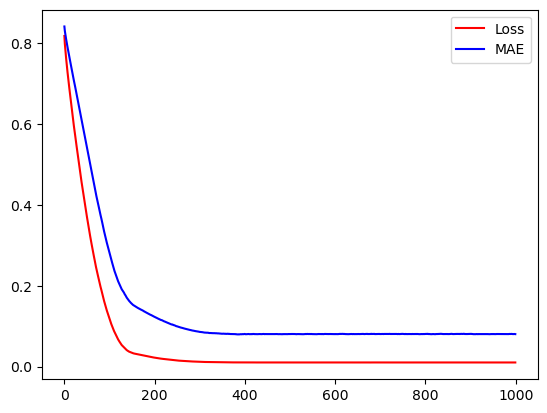

In [23]:
# 6. 평가하기
plt.plot(hist2.history['loss'],
         'r',
         label = 'Loss')
plt.plot(hist2.history['mae'],
         'b',
         label = 'MAE')
plt.legend()
plt.show()

In [24]:
# 7. 예측하기
model2.predict(np.array([[0],
                         [.01],]))

1/1 [==============================] - 0s 52ms/step


array([[0.30218685],
       [0.32052818]], dtype=float32)

In [25]:
y_hat2 = model2.predict([scaled_data_c])

4/4 [==============================] - 0s 2ms/step


In [26]:
for h, y in zip(y_hat2, scaled_data_f):
    print('예측:{}, 실제:{}'.format(h, y))

예측:[0.30218685], 실제:0.48905257038003563
예측:[0.32052818], 실제:0.2914062629459167
예측:[0.33886948], 실제:0.3592820163678585
예측:[0.35721081], 실제:0.4147516282996508
예측:[0.37555212], 실제:0.31310769713742614
예측:[0.39389345], 실제:0.4102065572905948
예측:[0.41223478], 실제:0.42791096141420687
예측:[0.4305761], 실제:0.2705275693654579
예측:[0.4489174], 실제:0.5657658005663493
예측:[0.46725875], 실제:0.542049851591955
예측:[0.48560005], 실제:0.43745710260332404
예측:[0.50394136], 실제:0.5008451738804279
예측:[0.5222827], 실제:0.5865299374196752
예측:[0.540624], 실제:0.5278643584808353
예측:[0.5589653], 실제:0.5477250921327455
예측:[0.5773066], 실제:0.44467585875092086
예측:[0.59564793], 실제:0.6634580311891888
예측:[0.6139893], 실제:0.6383880905287038
예측:[0.63233066], 실제:0.6714459923759963
예측:[0.65067196], 실제:0.509347546813016
예측:[0.66901326], 실제:0.8450699691186476
예측:[0.68735456], 실제:0.7134335535456359
예측:[0.70569587], 실제:0.6772860056713612
예측:[0.72403723], 실제:0.9369072220761113
예측:[0.74237853], 실제:0.7474613970139354
예측:[0.7607199], 실제:0.624932130

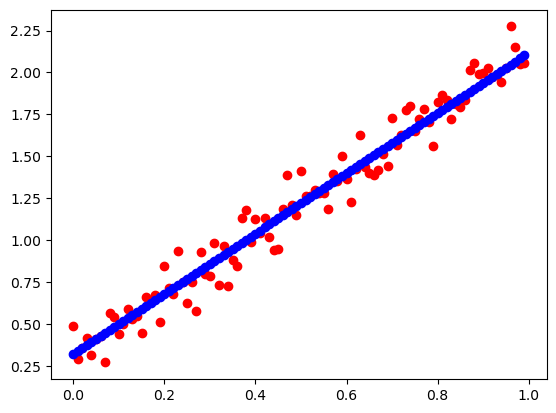

In [27]:
plt.scatter(x = scaled_data_c,
            y = scaled_data_f,
            c = 'r')
plt.scatter(x = scaled_data_c,
            y = y_hat, 
            c = 'b')
plt.show()